### Import libraries

In [31]:
import numpy as np
import cv2
import os

**Parameter**

In [32]:
folder_path = "trafficSignData"
label_file = 'labels.csv'
imageDimesions = (32, 32)
imageDimesiontest = (32, 32, 3)
ratio = 0.2

### Load the images and number of classes

In [33]:
images = []
classNumber = []

In [34]:
# get the path of the traffic data
myList = os.listdir(folder_path)
print("View each classes in traffic folder :", myList, "\n")

# get the number of classes (number of folder)
lengthOfClasses = len(myList)
print("Total length of classes :", lengthOfClasses, "\n")


View each classes in traffic folder : ['50', '57', '32', '35', '56', '51', '34', '33', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '45', '6', '28', '17', '1', '10', '19', '26', '8', '21', '44', '43', '38', '36', '31', '54', '53', '30', '37', '39', '52', '55', '46', '41', '48', '24', '23', '4', '15', '3', '12', '49', '40', '47', '2', '13', '5', '14', '22', '25'] 

Total length of classes : 58 



### Iterate to load the images and classes

In [35]:
print("Iterating to load images & classes\n")
# iterate 0 to length of classes (58)
for x in range(0, lengthOfClasses): # x is folder
    imagesList = os.listdir(os.path.join(folder_path, str(x))) # each (x) folder in trafficSignData 
    for img in imagesList:
        currentImage = cv2.imread(folder_path + "/" + str(x) + "/" + img) # trafficSignData --> x folder --> img = images
        if currentImage is not None:  # Check image is read
            currentImage = cv2.resize(currentImage, imageDimesions) # Resize to the dimensions to 32 X 32 pixels
            images.append(currentImage)
            classNumber.append(x)
        else:
            print(f"It is wrong folder path {folder_path}")
    print(x, end=" ")

Iterating to load images & classes

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 

### Convert list to numpy array

In [36]:
# Convert list to numpy array
images = np.array(images)
classNumber = np.array(classNumber)

**Result**

In [37]:
print(images)
print(classNumber)

[[[[ 41  39  32]
   [ 38  39  31]
   [ 38  38  30]
   ...
   [155 153 151]
   [190 190 190]
   [192 192 192]]

  [[ 40  40  30]
   [ 38  38  32]
   [ 40  38  31]
   ...
   [151 150 147]
   [189 190 190]
   [189 189 189]]

  [[ 41  41  31]
   [ 39  39  30]
   [ 38  39  30]
   ...
   [145 146 141]
   [188 188 188]
   [185 185 185]]

  ...

  [[194 189 181]
   [195 190 176]
   [196 189 178]
   ...
   [121  49   7]
   [123  51   5]
   [121  50   8]]

  [[194 185 171]
   [193 184 173]
   [194 185 172]
   ...
   [165 158 151]
   [167 160 150]
   [167 162 153]]

  [[179 174 166]
   [179 174 166]
   [183 176 168]
   ...
   [125  55  13]
   [126  56  12]
   [127  55  13]]]


 [[[126  64  21]
   [138  91  58]
   [143 102  71]
   ...
   [165 155 142]
   [176 180 185]
   [162 166 170]]

  [[139 110  93]
   [154 140 129]
   [120  78  58]
   ...
   [164 159 153]
   [174 178 183]
   [169 171 171]]

  [[135  97  75]
   [145 114 101]
   [140 126 119]
   ...
   [157 162 164]
   [185 188 192]
   [179 179

**Check images shape and classNumber**

- the first number is number of images
- 32 x 32 images
- 3 mean RGB 3 channals

In [38]:
print(images.shape)
print(classNumber.shape)

(4170, 32, 32, 3)
(4170,)


### Data Spliting

**import train_test_split**

In [39]:
from sklearn.model_selection import train_test_split

### Spliting the data
- split the array images, classNumber, set the test size for exmaple 0.2
- test_size = 0.2 means that training will be 0.8 percent and test will be 0.2, so 20% testing and 80% training

In [40]:
X_train, X_test, y_train, y_test = train_test_split(images, classNumber, test_size=ratio)

**Check whether it is split or not (train, test)**
- by using shape function

In [41]:
print("After spliting for images for traning")
print(X_train.shape)
print("After spliting for images for testing")
print(X_test.shape)

print("\n After spliting for classNUmber for traning & testing")
print(y_train.shape)
print(y_test.shape)

After spliting for images for traning
(3336, 32, 32, 3)
After spliting for images for testing
(834, 32, 32, 3)

 After spliting for classNUmber for traning & testing
(3336,)
(834,)


**Get the X_validation**
- to get X_validation use the 80% of images array which is X_train and use y_train

In [42]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=ratio)
print('Get the X_validation')
print(X_validation.shape)

Get the X_validation
(668, 32, 32, 3)


**Print X_train, X_test, and X_validation**

In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

# print(X_train)
# print(y_train)

(2668, 32, 32, 3) (2668,)
(834, 32, 32, 3) (834,)
(668, 32, 32, 3) (668,)


### Check the images and classes are match & dimension are correct

In [44]:
try:
    # check it is same or not
    assert X_train.shape[0] == y_train.shape[0], "Number of images and class should be match for training"
    assert X_test.shape[0] == y_test.shape[0], "Number of images and class should be match for testing"
    # check dimensions is same or not
    assert X_train.shape[1:] == imageDimesiontest, "Dimensions should be same one for training"
    assert X_test.shape[1:] == imageDimesiontest, "Dimensions should be same one for testing"
    print("All tests passed")
except AssertionError as e:
    print(e)


All tests passed


**What inside the X and Y**
- X_train contain = actual images, Y_train contain = the ids of each image

In [45]:
# show the all the index numbers which are class number 0
print("Index which related to class 0")
print(np.where(y_train==0))
# total length of classNumber 0
print("Length of the class 0")
print(len(np.where(y_train==0)[0]))

# Declare array to store length of each class
numberOfSamples = []

print("Total number of images for each Class")
for x in range(0,lengthOfClasses):
    print(f"Class {x}: {len(np.where(y_train == x)[0])}")
    # save each class in array
    numberOfSamples.append(len(np.where(y_train == x)[0]))

print(f"Array of classes's length : {numberOfSamples}")

Index which related to class 0
(array([ 123,  172,  189,  197,  258,  260,  285,  286,  304,  306,  311,
        313,  343,  349,  355,  374,  410,  453,  474,  487,  490,  515,
        565,  601,  627,  646,  697,  866,  924,  980,  997, 1062, 1100,
       1196, 1236, 1290, 1403, 1457, 1462, 1596, 1639, 1666, 1673, 1702,
       1733, 1890, 1893, 1917, 1925, 2052, 2073, 2077, 2080, 2112, 2115,
       2140, 2197, 2207, 2236, 2238, 2278, 2310, 2313, 2317, 2320, 2345,
       2372, 2405, 2505, 2507, 2529, 2569, 2583, 2610, 2629, 2643]),)
Length of the class 0
76
Total number of images for each Class
Class 0: 76
Class 1: 29
Class 2: 51
Class 3: 175
Class 4: 64
Class 5: 122
Class 6: 48
Class 7: 96
Class 8: 6
Class 9: 2
Class 10: 50
Class 11: 87
Class 12: 48
Class 13: 25
Class 14: 82
Class 15: 12
Class 16: 88
Class 17: 77
Class 18: 5
Class 19: 2
Class 20: 12
Class 21: 10
Class 22: 14
Class 23: 10
Class 24: 60
Class 25: 1
Class 26: 77
Class 27: 19
Class 28: 290
Class 29: 25
Class 30: 108
Class

### Virtualize the classes by number of length
- to make the chart, we need to import the matplotlib

**Import library**

In [46]:
import matplotlib.pyplot as plt

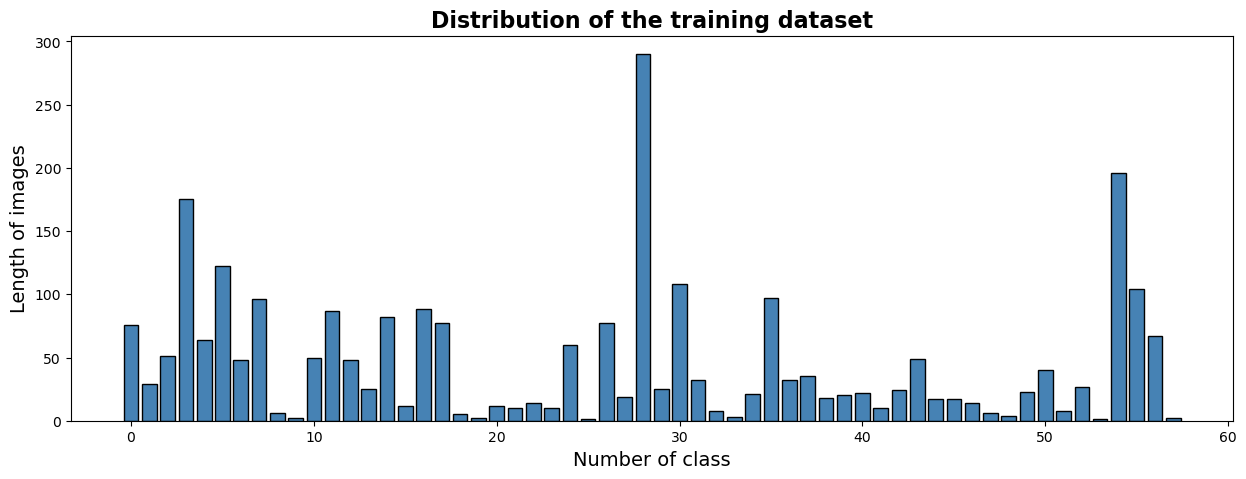

In [47]:
# 15 mean to length of figure & 5 mean to height of figure
plt.figure(figsize=(15, 5))

# start 0 to lengthofClasses, 
plt.bar(range(0, lengthOfClasses), numberOfSamples, color="steelblue", edgecolor='black')
plt.title("Distribution of the training dataset", fontsize=16, fontweight='bold')
plt.xlabel("Number of class", fontsize=14)
plt.ylabel("Length of images", fontsize=14)
plt.show()

### Virtualize with line chart

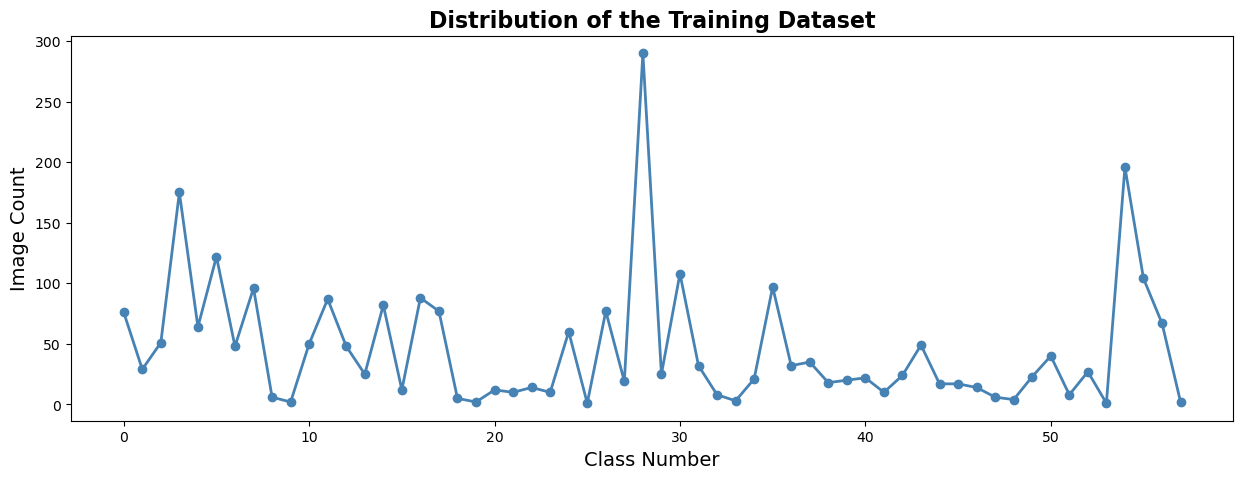

In [48]:
plt.figure(figsize=(15, 5))
plt.plot(range(0, lengthOfClasses), numberOfSamples, marker='o', color="steelblue", linewidth=2)
plt.title("Distribution of the Training Dataset", fontsize=16, fontweight='bold')
plt.xlabel("Class Number", fontsize=14)
plt.ylabel("Image Count", fontsize=14)
plt.show()


### Read the CSV file
- to read the csv files, the pandas library need to import

In [49]:
import pandas as pd

In [50]:
data = pd.read_csv(label_file)
print("data shape ", data.shape, type(data))

data shape  (58, 2) <class 'pandas.core.frame.DataFrame'>


#### What is data
- it is a DataFrame object

In [51]:
print("All the information inside data")
print(data)

print("\nPrint only one row of that")
print(data.iloc[0])


All the information inside data
    ClassId                          Name
0         0           Speed limit (5km/h)
1         1          Speed limit (15km/h)
2         2          Speed limit (30km/h)
3         3          Speed limit (40km/h)
4         4          Speed limit (50km/h)
5         5          Speed limit (60km/h)
6         6          Speed limit (70km/h)
7         7          speed limit (80km/h)
8         8      Dont Go straight or left
9         9     Dont Go straight or Right
10       10              Dont Go straight
11       11                  Dont Go Left
12       12         Dont Go Left or Right
13       13                 Dont Go Right
14       14       Dont overtake from Left
15       15                      No Uturn
16       16                        No Car
17       17                       No horn
18       18          Speed limit (40km/h)
19       19          Speed limit (50km/h)
20       20          Go straight or right
21       21                   Go straight
22

### Display image for each class

In [52]:
import random

#### Numpy Array
- it is 3-dimensional NumPy array which store the pixels of the images
- For example [70, 65, 61] is a RGB color

In [53]:
print(X_train[0])

[[[153 156 159]
  [215 213 212]
  [215 213 212]
  ...
  [214 212 211]
  [214 212 211]
  [215 213 212]]

 [[215 213 212]
  [214 215 213]
  [215 213 212]
  ...
  [214 212 211]
  [214 212 211]
  [214 212 211]]

 [[215 213 212]
  [215 214 213]
  [215 213 211]
  ...
  [214 212 211]
  [214 212 211]
  [214 213 210]]

 ...

 [[150 130 114]
  [140  89  59]
  [143  91  58]
  ...
  [141 120 108]
  [209 208 207]
  [207 208 206]]

 [[138 120 108]
  [141 100  74]
  [144  95  61]
  ...
  [141 122 108]
  [207 208 206]
  [208 208 206]]

 [[139 136 128]
  [141 135 129]
  [139 102  77]
  ...
  [142 121 106]
  [207 208 206]
  [207 208 206]]]


#### Explanation about the below code

- imshow() that display an image
- x_selected[random_index, :, :] get the ramdom image, :, : that take all pixel values in dimensions
- axs[col].axis("off") to hide the unnecessary number

Total number for class number 0 : 76


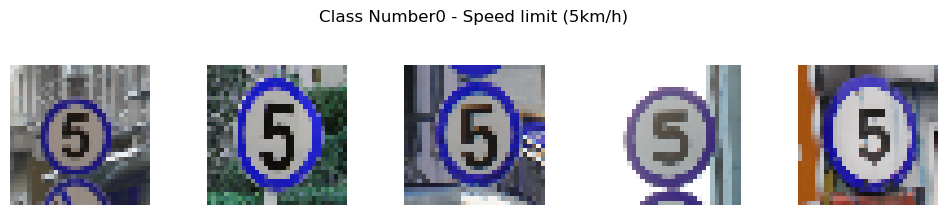

Total number for class number 1 : 29


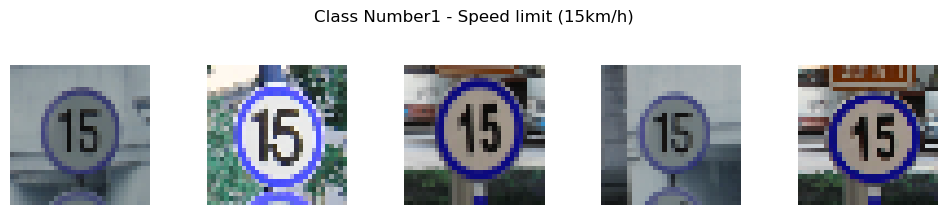

Total number for class number 2 : 51


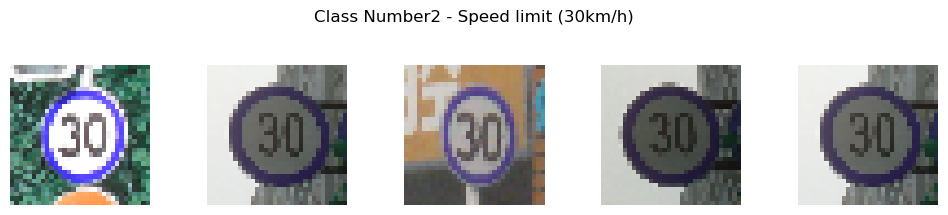

Total number for class number 3 : 175


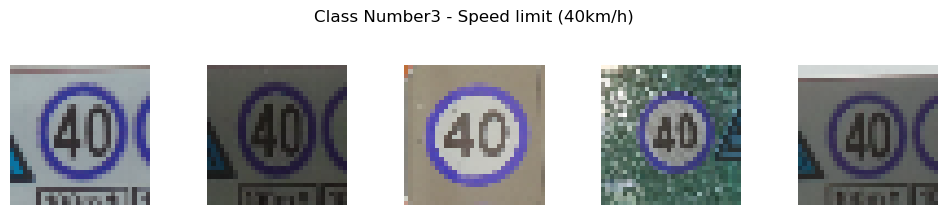

Total number for class number 4 : 64


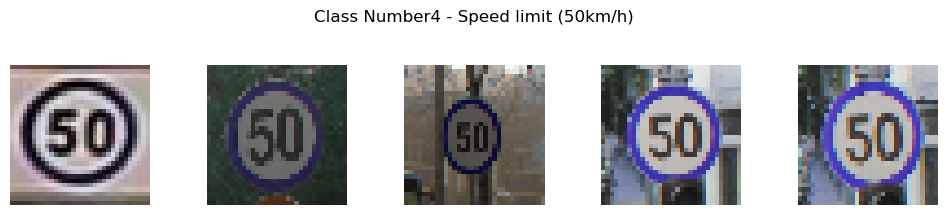

Total number for class number 5 : 122


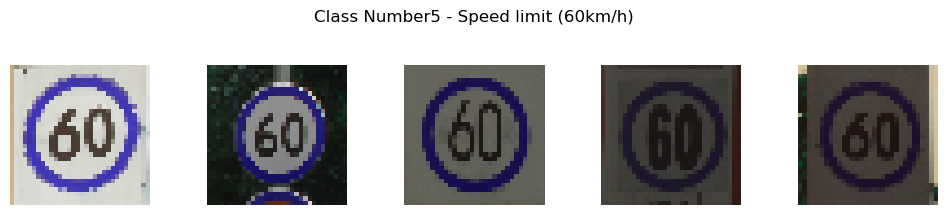

Total number for class number 6 : 48


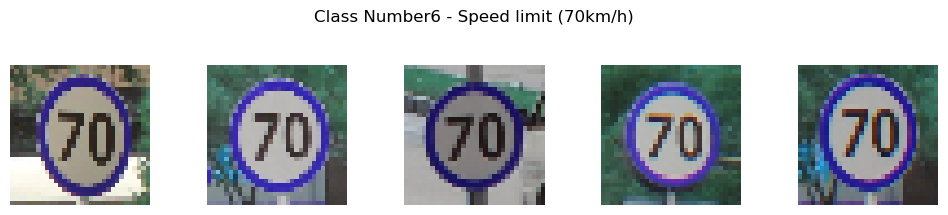

Total number for class number 7 : 96


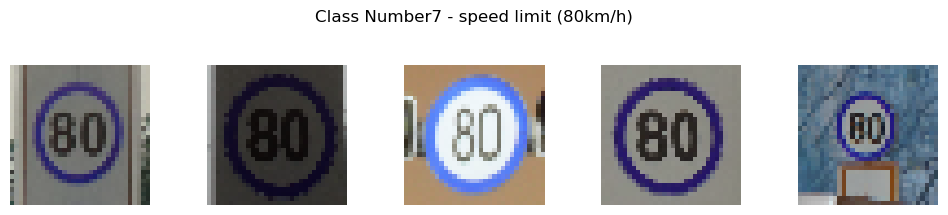

Total number for class number 8 : 6


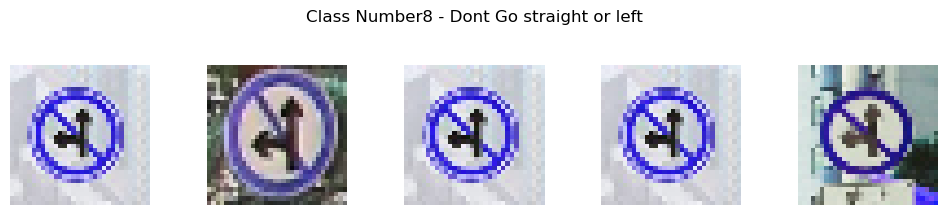

Total number for class number 9 : 2


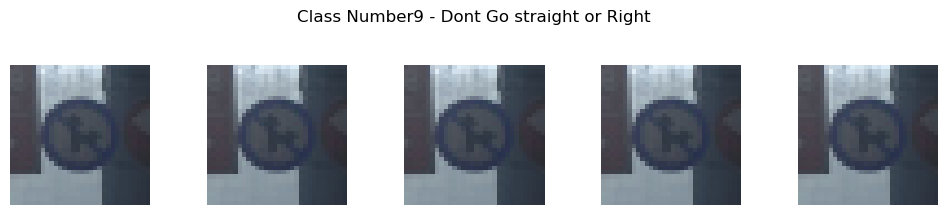

Total number for class number 10 : 50


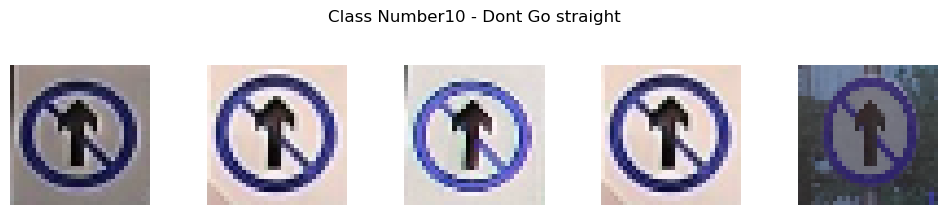

Total number for class number 11 : 87


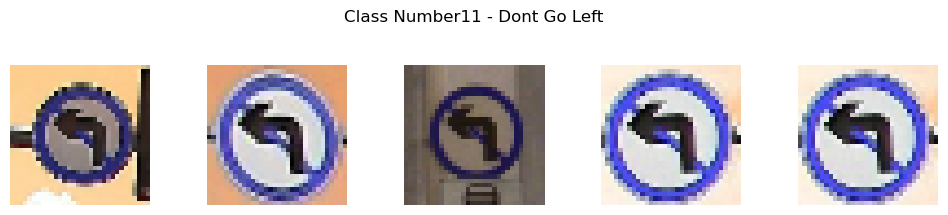

Total number for class number 12 : 48


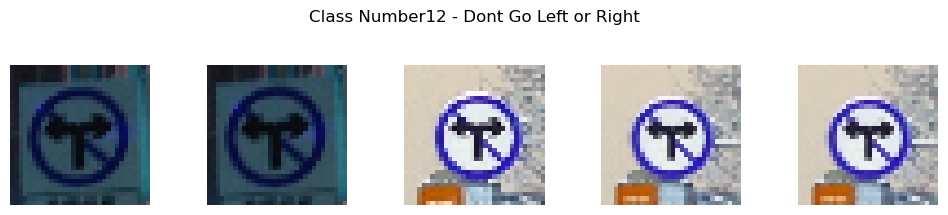

Total number for class number 13 : 25


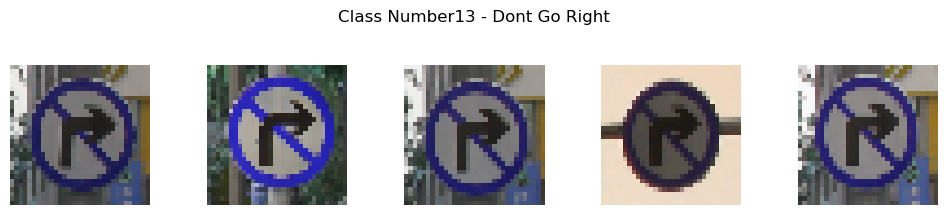

Total number for class number 14 : 82


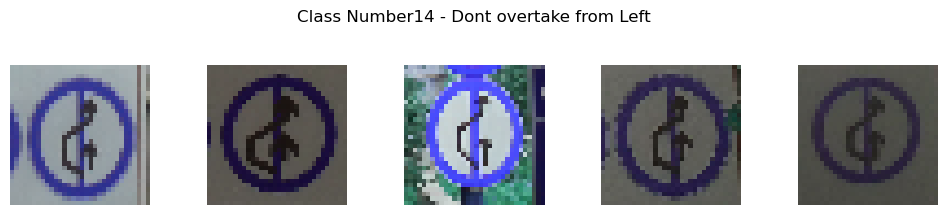

Total number for class number 15 : 12


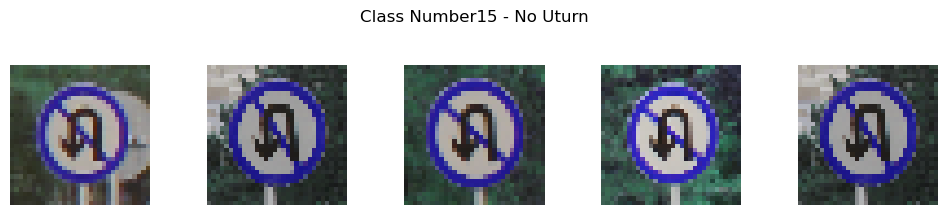

Total number for class number 16 : 88


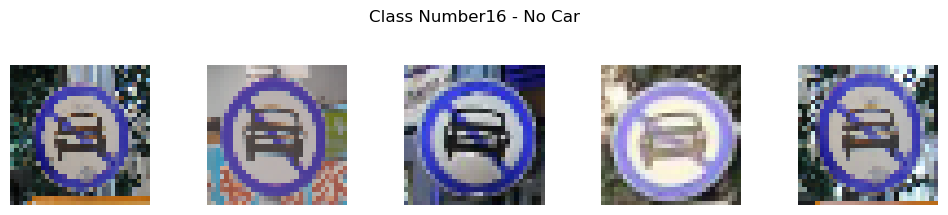

Total number for class number 17 : 77


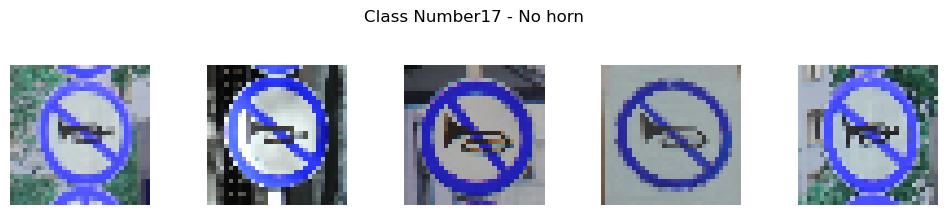

Total number for class number 18 : 5


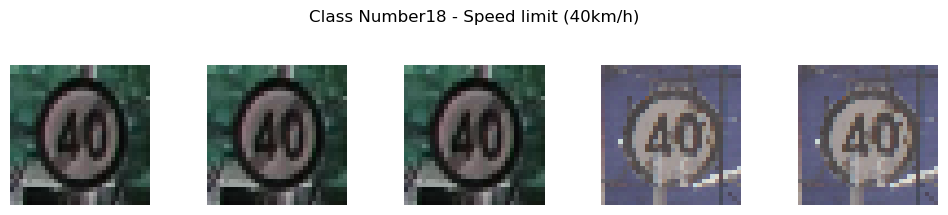

Total number for class number 19 : 2


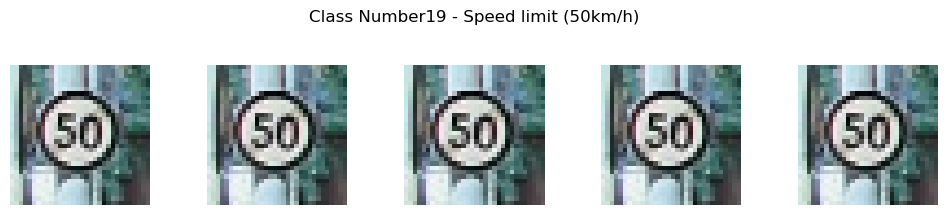

Total number for class number 20 : 12


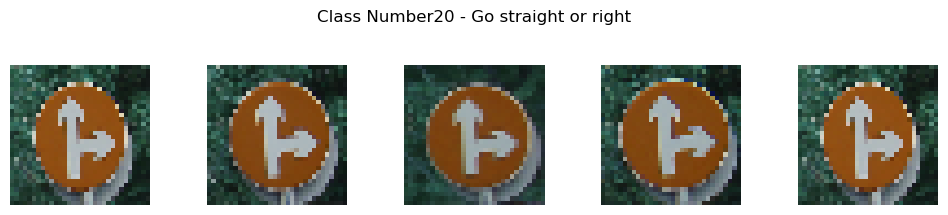

Total number for class number 21 : 10


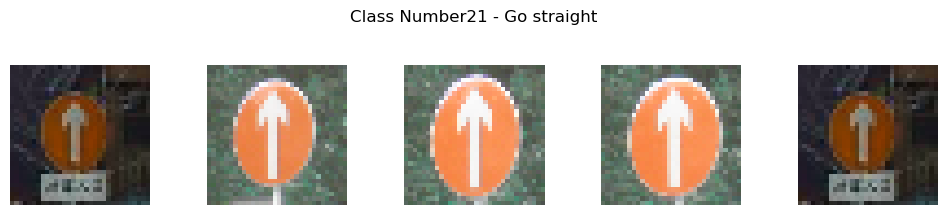

Total number for class number 22 : 14


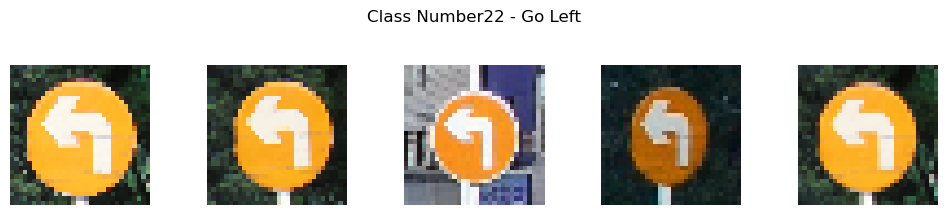

Total number for class number 23 : 10


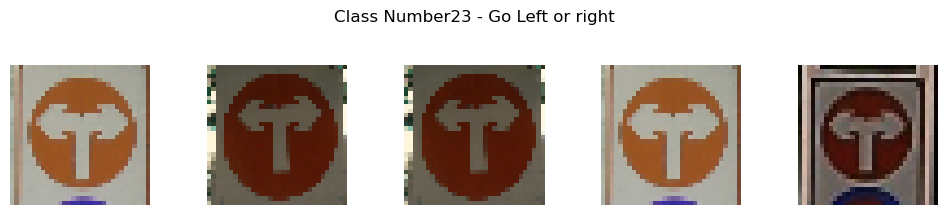

Total number for class number 24 : 60


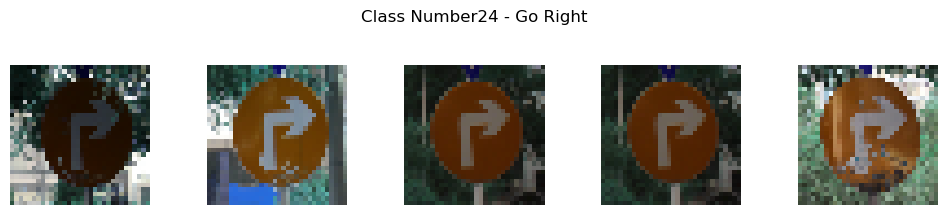

Total number for class number 25 : 1


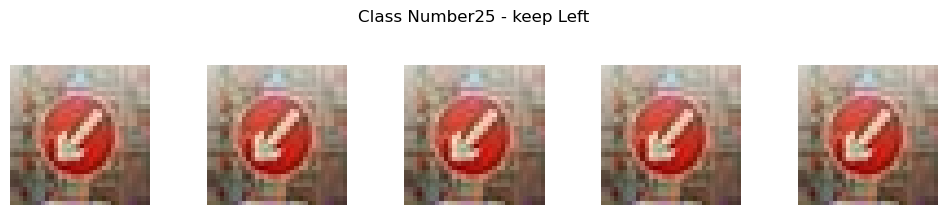

Total number for class number 26 : 77


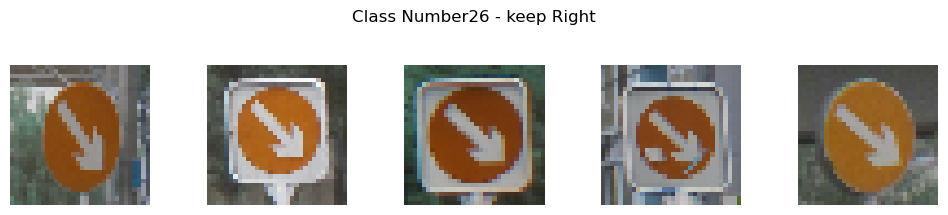

Total number for class number 27 : 19


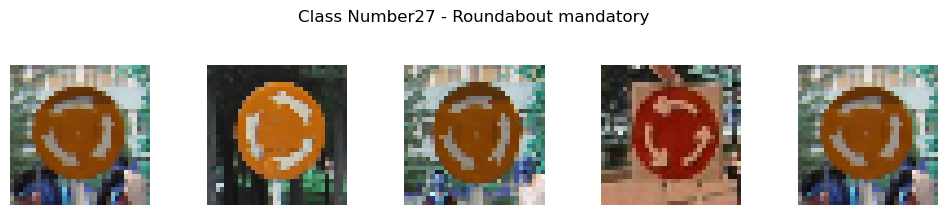

Total number for class number 28 : 290


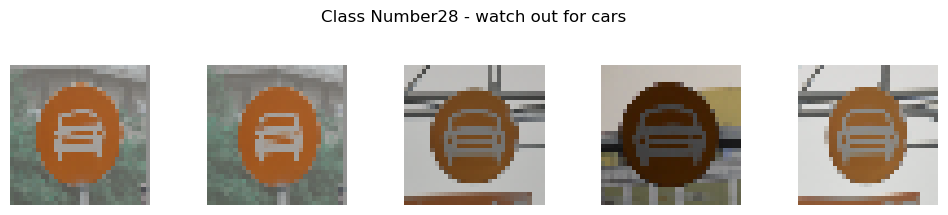

Total number for class number 29 : 25


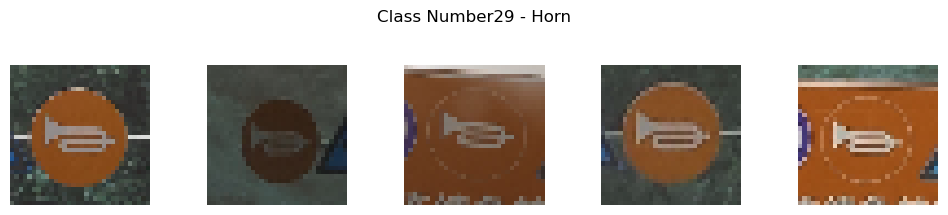

Total number for class number 30 : 108


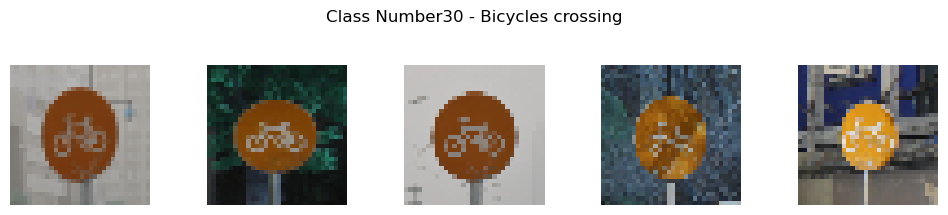

Total number for class number 31 : 32


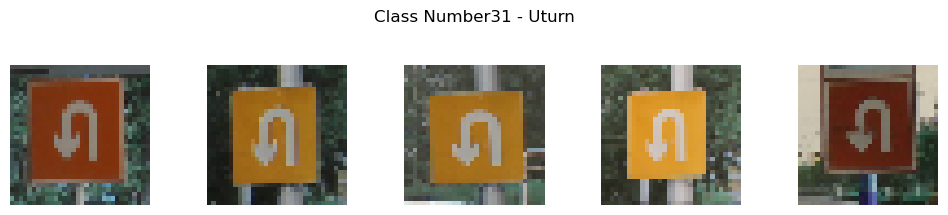

Total number for class number 32 : 8


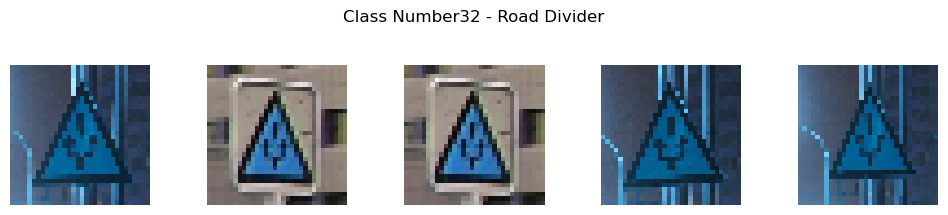

Total number for class number 33 : 3


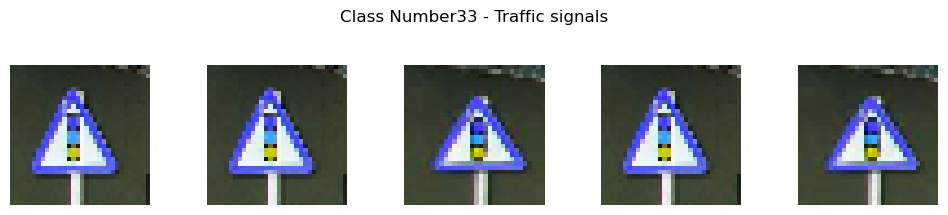

Total number for class number 34 : 21


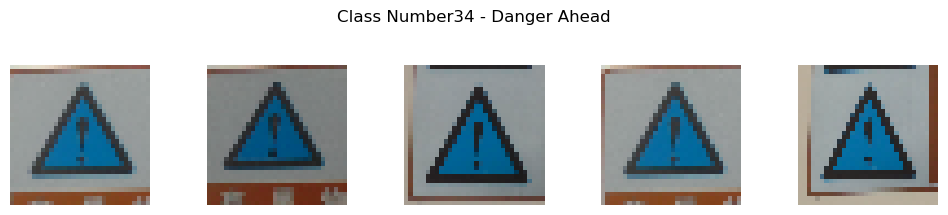

Total number for class number 35 : 97


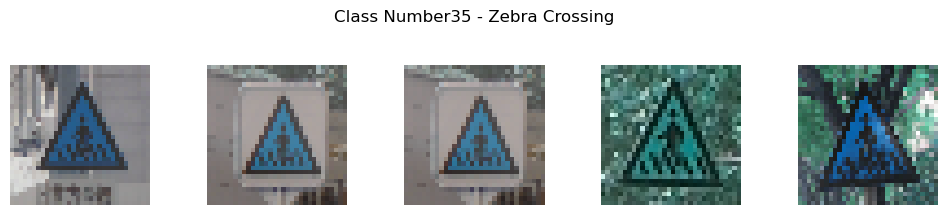

Total number for class number 36 : 32


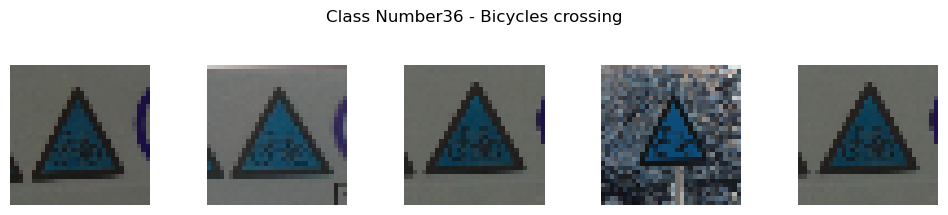

Total number for class number 37 : 35


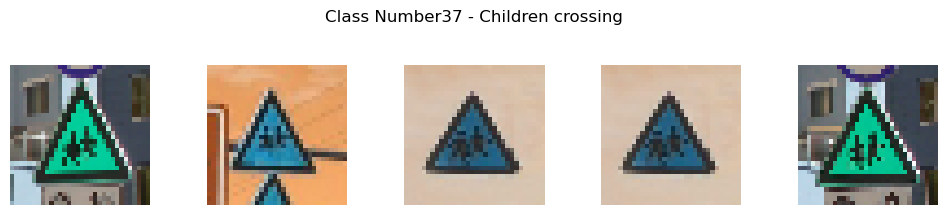

Total number for class number 38 : 18


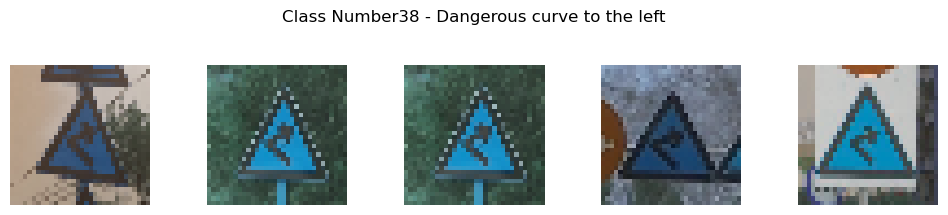

Total number for class number 39 : 20


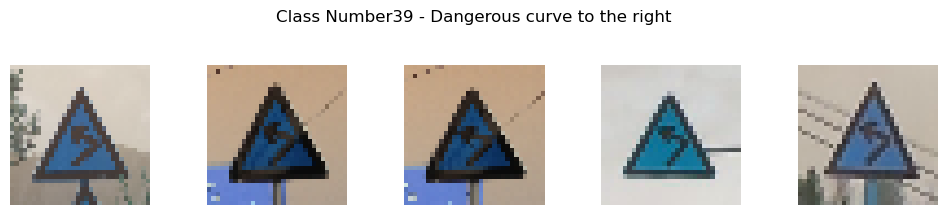

Total number for class number 40 : 22


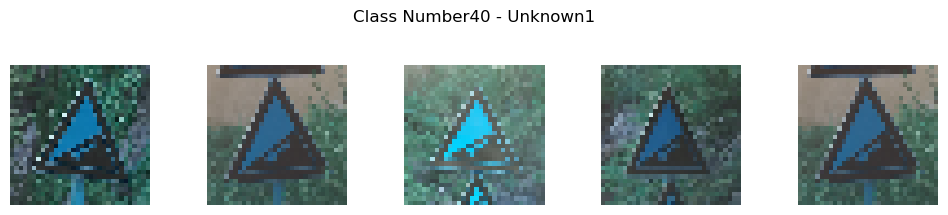

Total number for class number 41 : 10


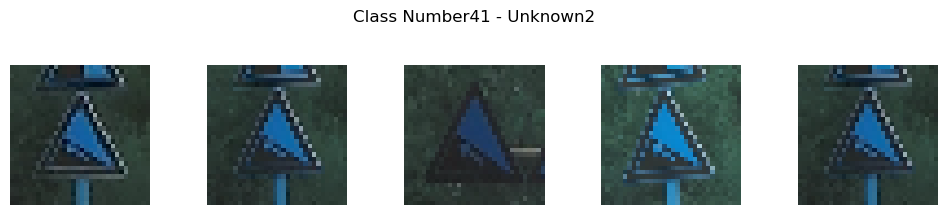

Total number for class number 42 : 24


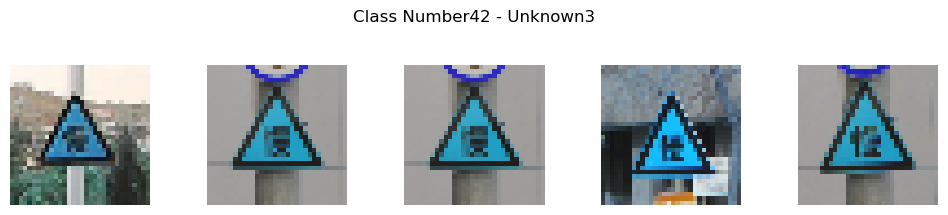

Total number for class number 43 : 49


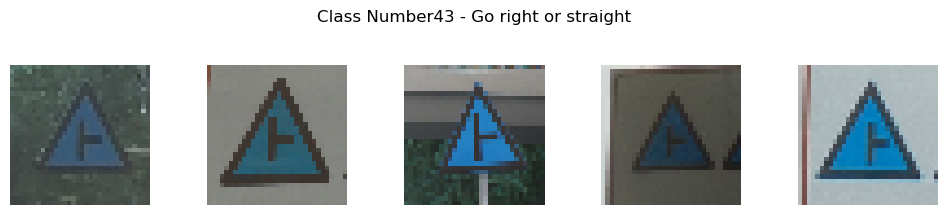

Total number for class number 44 : 17


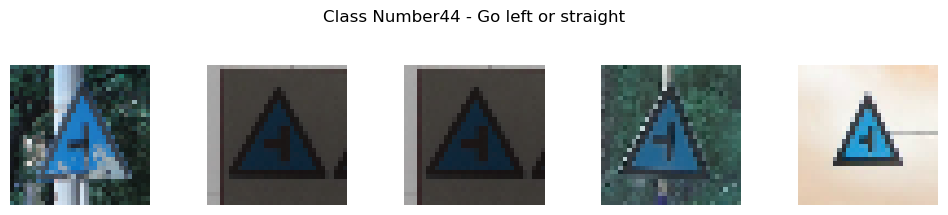

Total number for class number 45 : 17


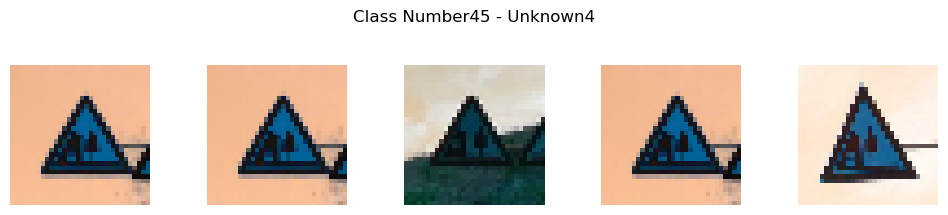

Total number for class number 46 : 14


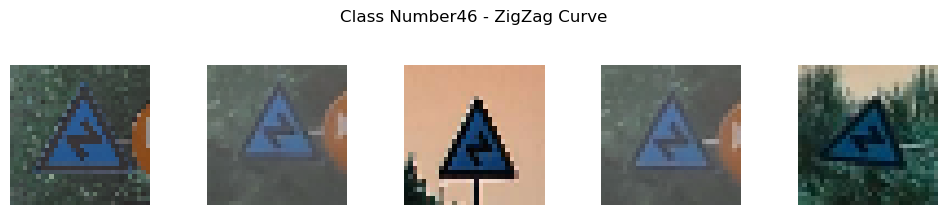

Total number for class number 47 : 6


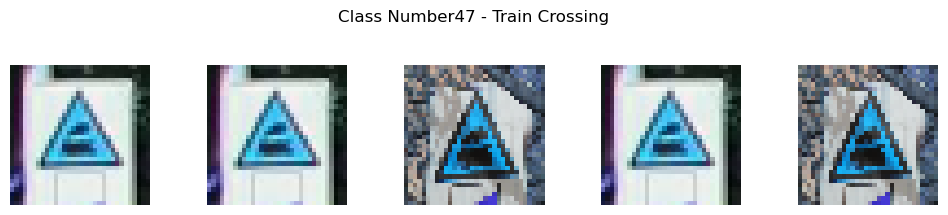

Total number for class number 48 : 4


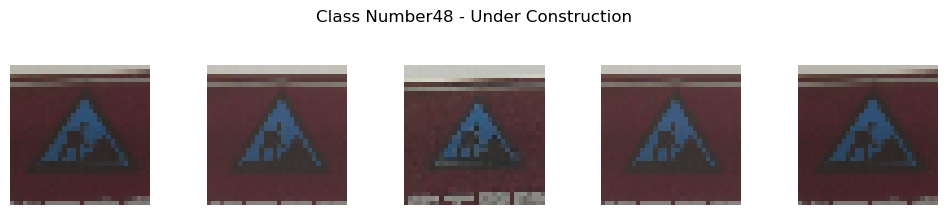

Total number for class number 49 : 23


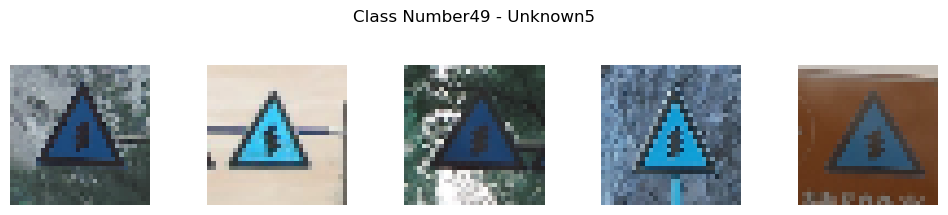

Total number for class number 50 : 40


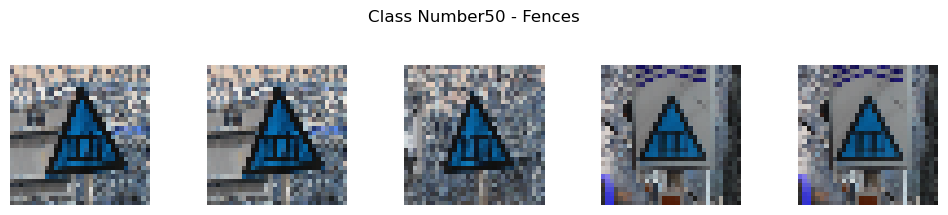

Total number for class number 51 : 8


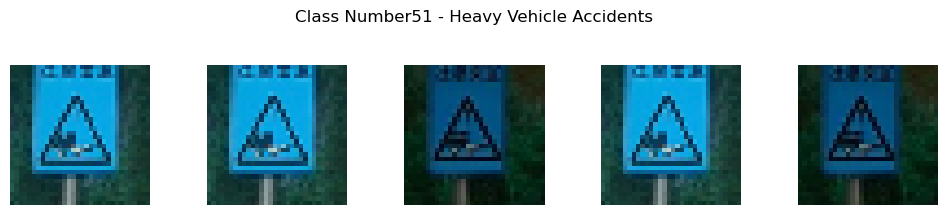

Total number for class number 52 : 27


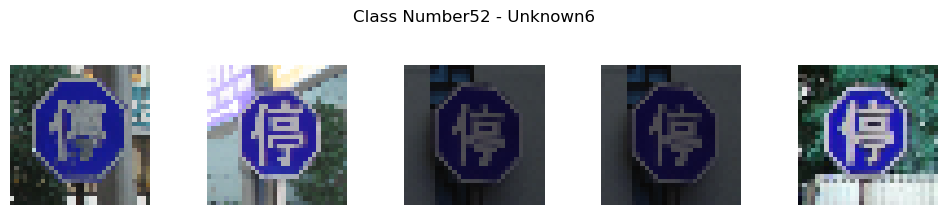

Total number for class number 53 : 1


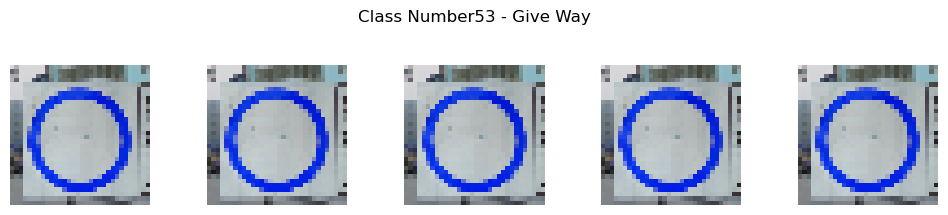

Total number for class number 54 : 196


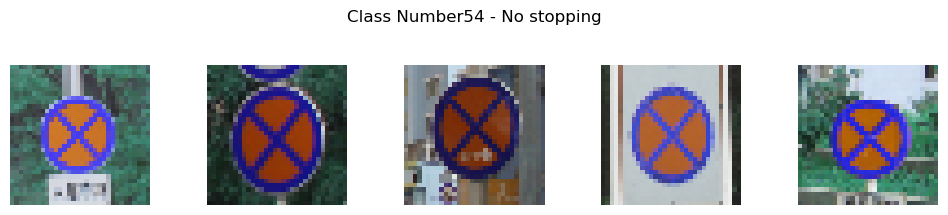

Total number for class number 55 : 104


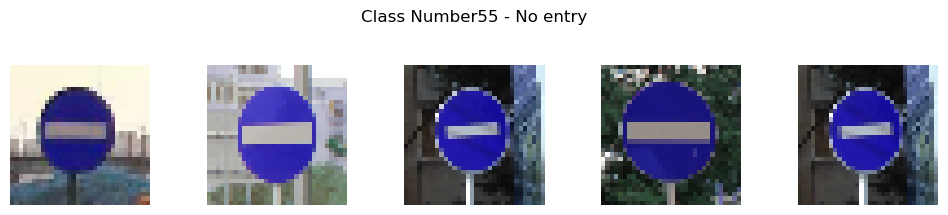

Total number for class number 56 : 67


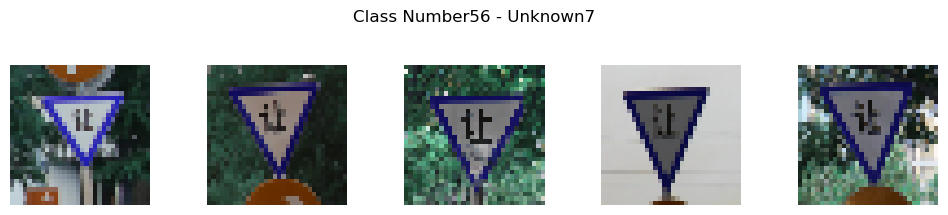

Total number for class number 57 : 2


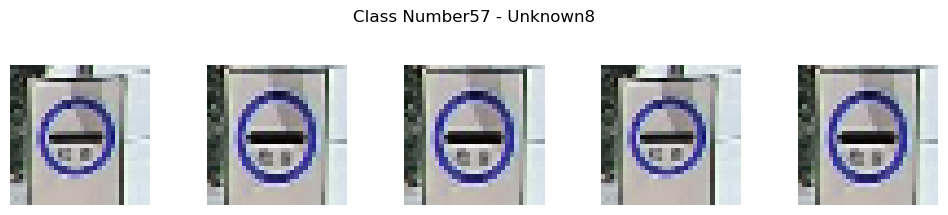

In [54]:
columns = 5

# Loop through each class and create a new figure for each
for classNo, row in data.iterrows():
    #print(row)
    fig, axs = plt.subplots(nrows=1, ncols=columns, figsize=(10, 2)) # ouput for 1 row with 5 columns
    fig.suptitle(f"Class Number{classNo} - {row['Name']}", fontsize=12, y=1.05) # ouput the tile for the plot Class [class id] - row['Name']

    # get the pixels values of image, in this case, filter the correct image that match with classNO
    x_selected = X_train[y_train == classNo]    
    lengthOfXselect = len(x_selected)
    print(f"Total number for class number {classNo} : {lengthOfXselect}")

    if lengthOfXselect == 0: 
        print(f"No images found for class number {classNo}. Skipping...")
        plt.close(fig)
        continue
    
    for col in range(columns):
        # get random inxdex from selected images which is numpy array
        random_index = random.randint(0, lengthOfXselect - 1)
        axs[col].imshow(x_selected[random_index, :, :], cmap="gray")
        # hide the axis number to view clearly
        axs[col].axis("off")
    
    # print out the image
    plt.tight_layout() # make the layout for photo
    plt.show() # print our photo

### Convert to gray image, equalize the light, hist, and normalize it (0 -255) to 0 - 1
#### the next thing is about preprocess all the images

- first make the function
- make image color to bgr to gray
- then equalize the image (mean make the lighting of image) so equalizeHist
- then we are going to normalize value, it means that gray scale value 0 - 255, we want to normalize 0 to 1
- normalize pixel values to [0, 1], want to restrict it from 0 to 1
- to have better training process
- output gray image

In [55]:
# function of convert gray image and euqlaise hist to image
def gray_and_lighting(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img

# function for preprocessing
def preprocessing(img):
    img = gray_and_lighting(img)
    img = img / 255
    return img

# images are in X_train and it will map and call the preprocessing function, this will give us a list
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_validation = np.array(list(map(preprocessing, X_validation)))

### Reshaping the images data with 1 becuase of gray images (3 channel to 1 channel)
- X_train.shape's [0] has number of images, [1] has height, and [2] has width

In [56]:
# Before Reshape
print("Before reshape", X_train.shape)

# Reshaping X_train
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)

# After Reshape
print("After reshape", X_train.shape)

Before reshape (2668, 32, 32)
After reshape (2668, 32, 32, 1)


##### If you want to view  image in X_train

In [57]:
# X_train = np.array(list(map(preprocessing, X_train)))
# img = X_train[30]
# img = cv2.resize(img,(300,300))
# cv2.imshow("Haha", img)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()

### Data Augmentation To Make More Generic

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

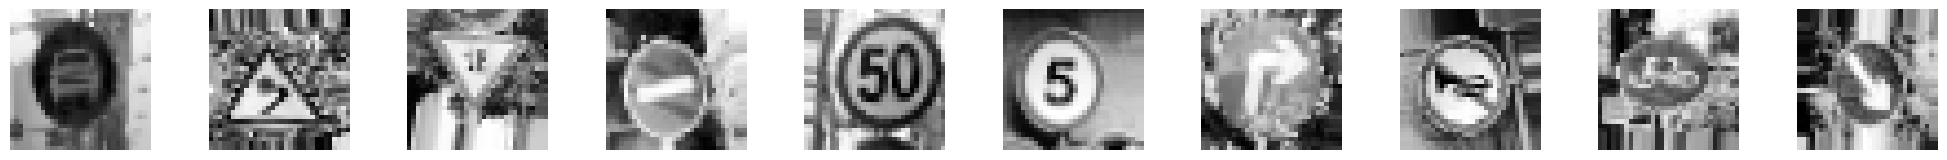

In [59]:
"""
Declare dataGenerator which is for Data Augmentation such as width & height shift, zoom in, shear, and rotate it
"""
dataGenerator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
dataGenerator.fit(X_train)

# flow method will create batches fo augment images, in this case 1 batch contain batch size of 20
# it is good for deal with large data, so this will feed them to the model, one batch at time
batches = dataGenerator.flow(X_train, y_train, batch_size=20)

# get the 1 batch from batches, X_batch contrain 20, and y_batch contrain label for X_batch
X_batch, y_batch = next(batches)

# Show the Augment image for 10 images
fig, axs = plt.subplots(1, 10, figsize=(20, 5))
fig.tight_layout()  # Adjust spacing to prevent overlap


for i in range(10):
    # Display each augmented image (reshaping to the original image dimensions)
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]), cmap='gray')
    axs[i].axis('off')
plt.show()






### One Hot Encoding
- import the library of to_categorical
- to convert label into One-hot-encoded format for classification
- use use one-hot encoded vectors, when predicting probabilities for different categories
- convert y_train (int value) to one-hot-encoded value, need the length of classes
- categorical cross-entropy loss function expects one-hot encoded labels

In [60]:
y_train = to_categorical(y_train, lengthOfClasses )
y_validation = to_categorical(y_validation, lengthOfClasses )
y_test = to_categorical(y_test, lengthOfClasses )